# Decision Tree ( Karar verme ağaçları )

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv("penguins.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Eksik Veriler

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [142]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [143]:
df.dropna(inplace=True) # Null olanları sil.

In [144]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [145]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [146]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [147]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [148]:
df[df["sex"] == "."] # Değeri karşımıza çıkardı.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [149]:
df = df[df["sex"] != "."] 

In [150]:
df[df["sex"] == "."] # Değeri karşımıza çıkardı.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [151]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: xlabel='species', ylabel='count'>

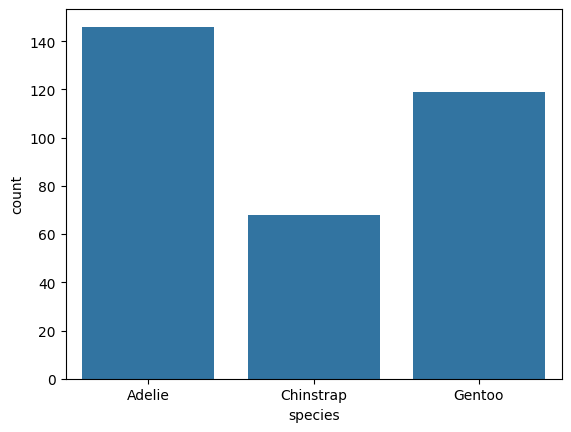

In [152]:
sns.countplot(x="species" , data=df)

In [153]:
df["species"].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

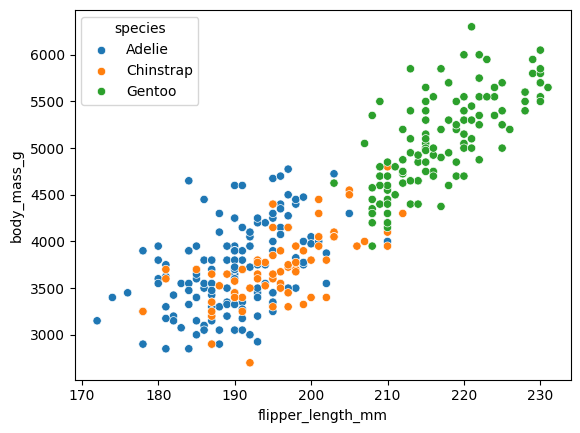

In [154]:
sns.scatterplot(x="flipper_length_mm" , y="body_mass_g" , data=df  , hue="species")

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

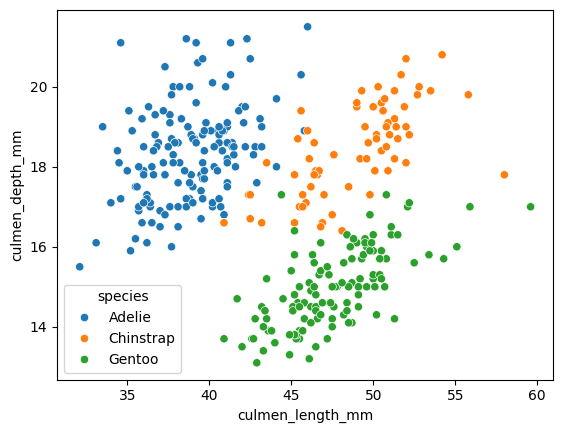

In [155]:
sns.scatterplot(x="culmen_length_mm" , y="culmen_depth_mm" , data=df , hue="species")

In [156]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


<Axes: xlabel='species', ylabel='culmen_length_mm'>

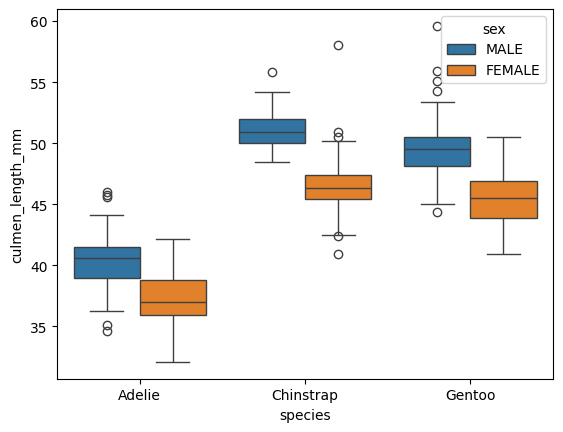

In [157]:
sns.boxplot(x="species" , y="culmen_length_mm", data=df ,hue="sex" )

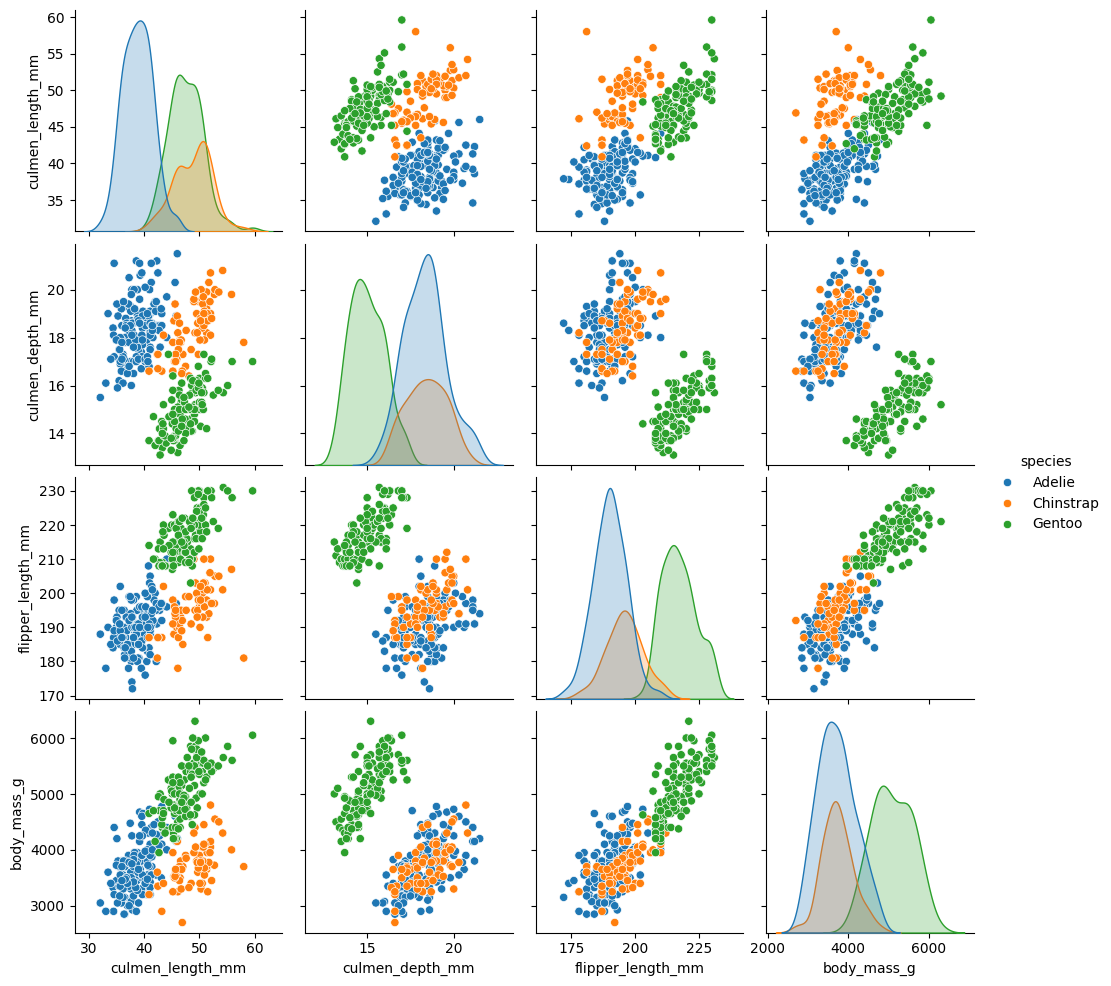

In [158]:
sns.pairplot(data=df , hue="species")

In [159]:
df.corr(numeric_only=True)

# could not convert string to float: 'Adelie' hatası alındığından dolayı
# bu parametre kullanıldı.


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: >

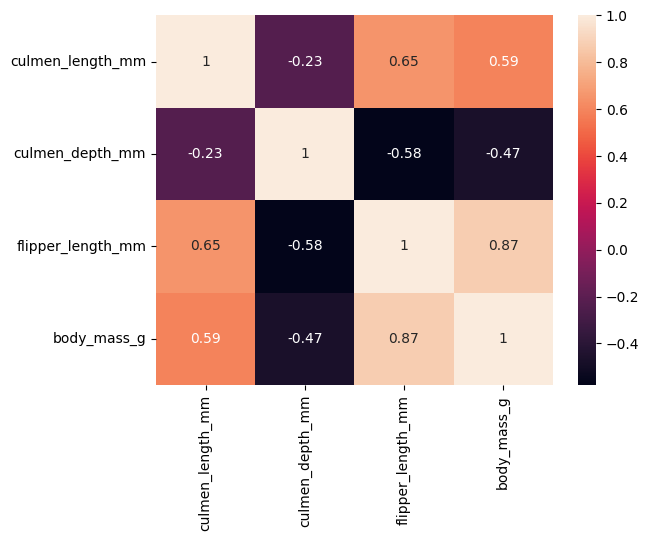

In [160]:
sns.heatmap(df.corr(numeric_only=True) , annot=True)

# Train Test Split

In [161]:
pd.get_dummies(df.drop("species" , axis=1) , drop_first=True)

# İlk sutunü düşür : drop_first=True

# Bazı verilerde mesela 
# island_Dream ve island_Torgersen false ,
# yani onun biscoe olduğu anlamına gelir

# sex_MALE true ise erkek false ise kadın 

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


 * get dummies
 * label encoder 
 * one hot encoder

fonk. aynı işlevi görür

In [162]:
x= pd.get_dummies(df.drop("species",axis =1), drop_first=True )
y= df["species"]


In [163]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=9)

## Karar verme ağacı modeli

In [166]:
from sklearn.tree import DecisionTreeClassifier

In [167]:
model= DecisionTreeClassifier()#random_state kullanılabilir.
model.fit(X_train , y_train)

DecisionTreeClassifier()

In [168]:
pengu_pred = model.predict(X_test)

# Değerlendirme

In [169]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , classification_report

In [170]:
confusion_matrix(y_test , pengu_pred)

array([[43,  2,  1],
       [ 0, 23,  0],
       [ 0,  0, 31]])

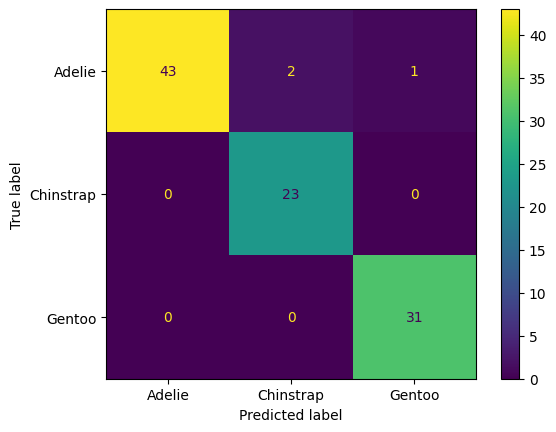

In [171]:
ConfusionMatrixDisplay.from_estimator(model, X_test , y_test)

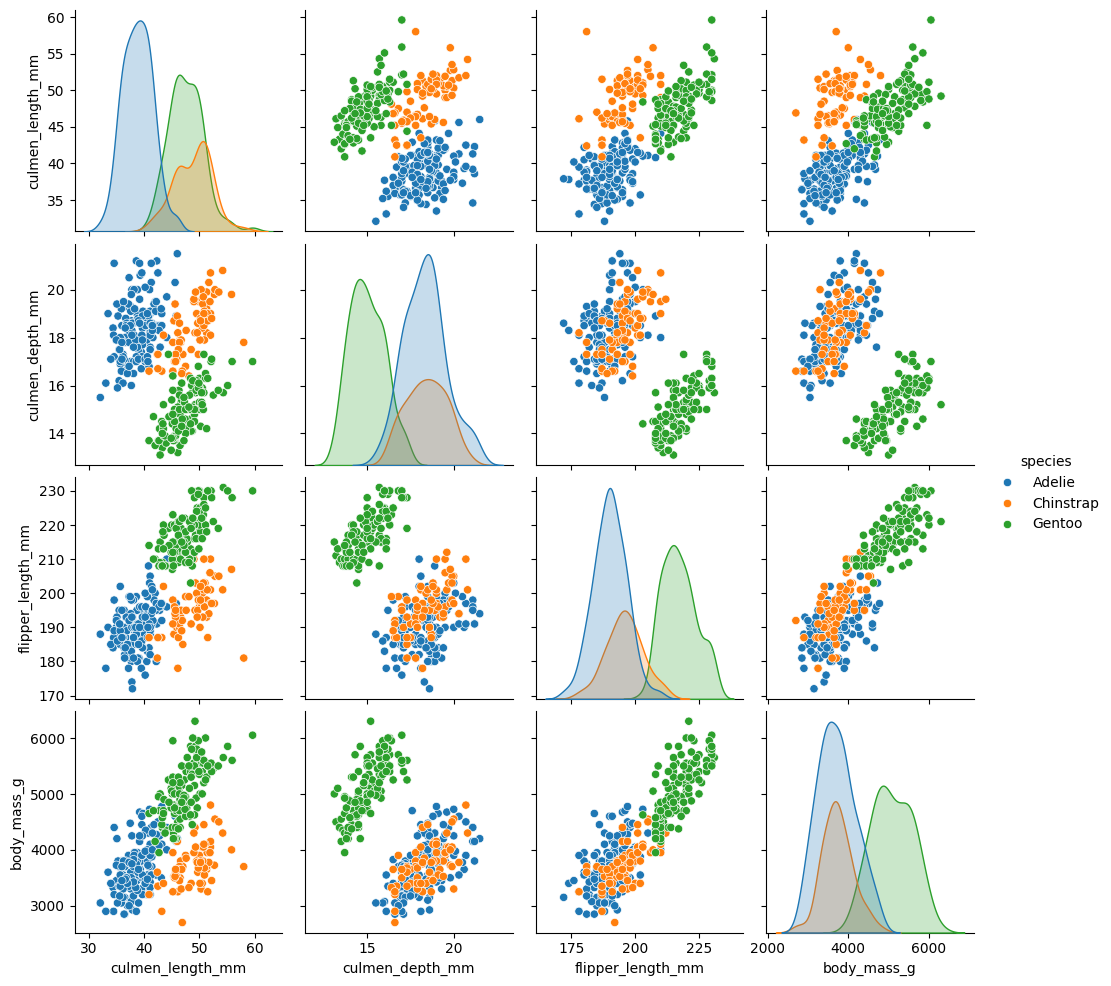

In [172]:
sns.pairplot(data=df , hue="species")

In [173]:
print(classification_report(y_test , pengu_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        46
   Chinstrap       0.92      1.00      0.96        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



In [174]:
model.feature_importances_

array([0.35823501, 0.04125461, 0.57120931, 0.        , 0.02930107,
       0.        , 0.        ])

In [175]:
pd.DataFrame(index=x.columns , data=model.feature_importances_ , columns=["Katsayılar"])

,Katsayılar
culmen_length_mm,0.358235
culmen_depth_mm,0.041255
flipper_length_mm,0.571209
body_mass_g,0.000000
island_Dream,0.029301
island_Torgersen,0.000000
sex_MALE,0.000000


# Karar verme ağacı nedir

In [176]:
from sklearn.tree import plot_tree

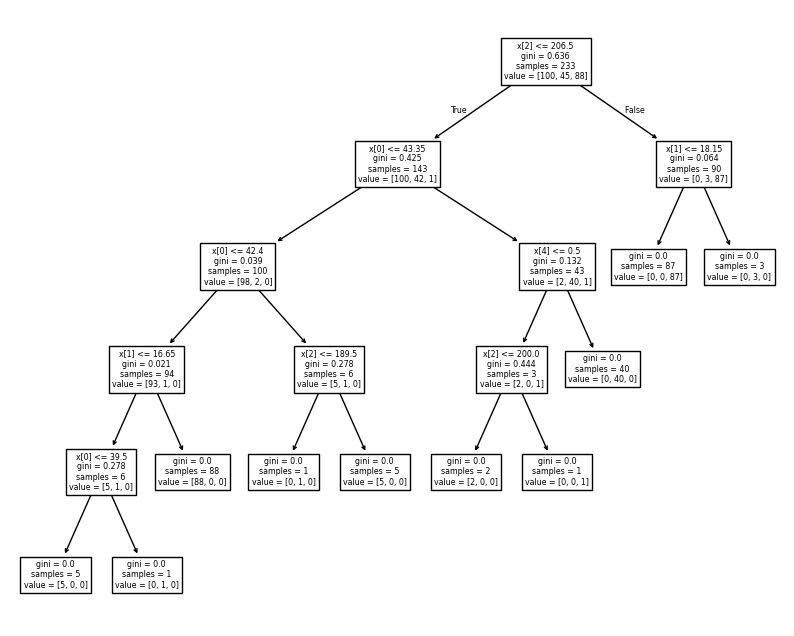

In [177]:
plt.figure(figsize=(10,8))
plot_tree(model);

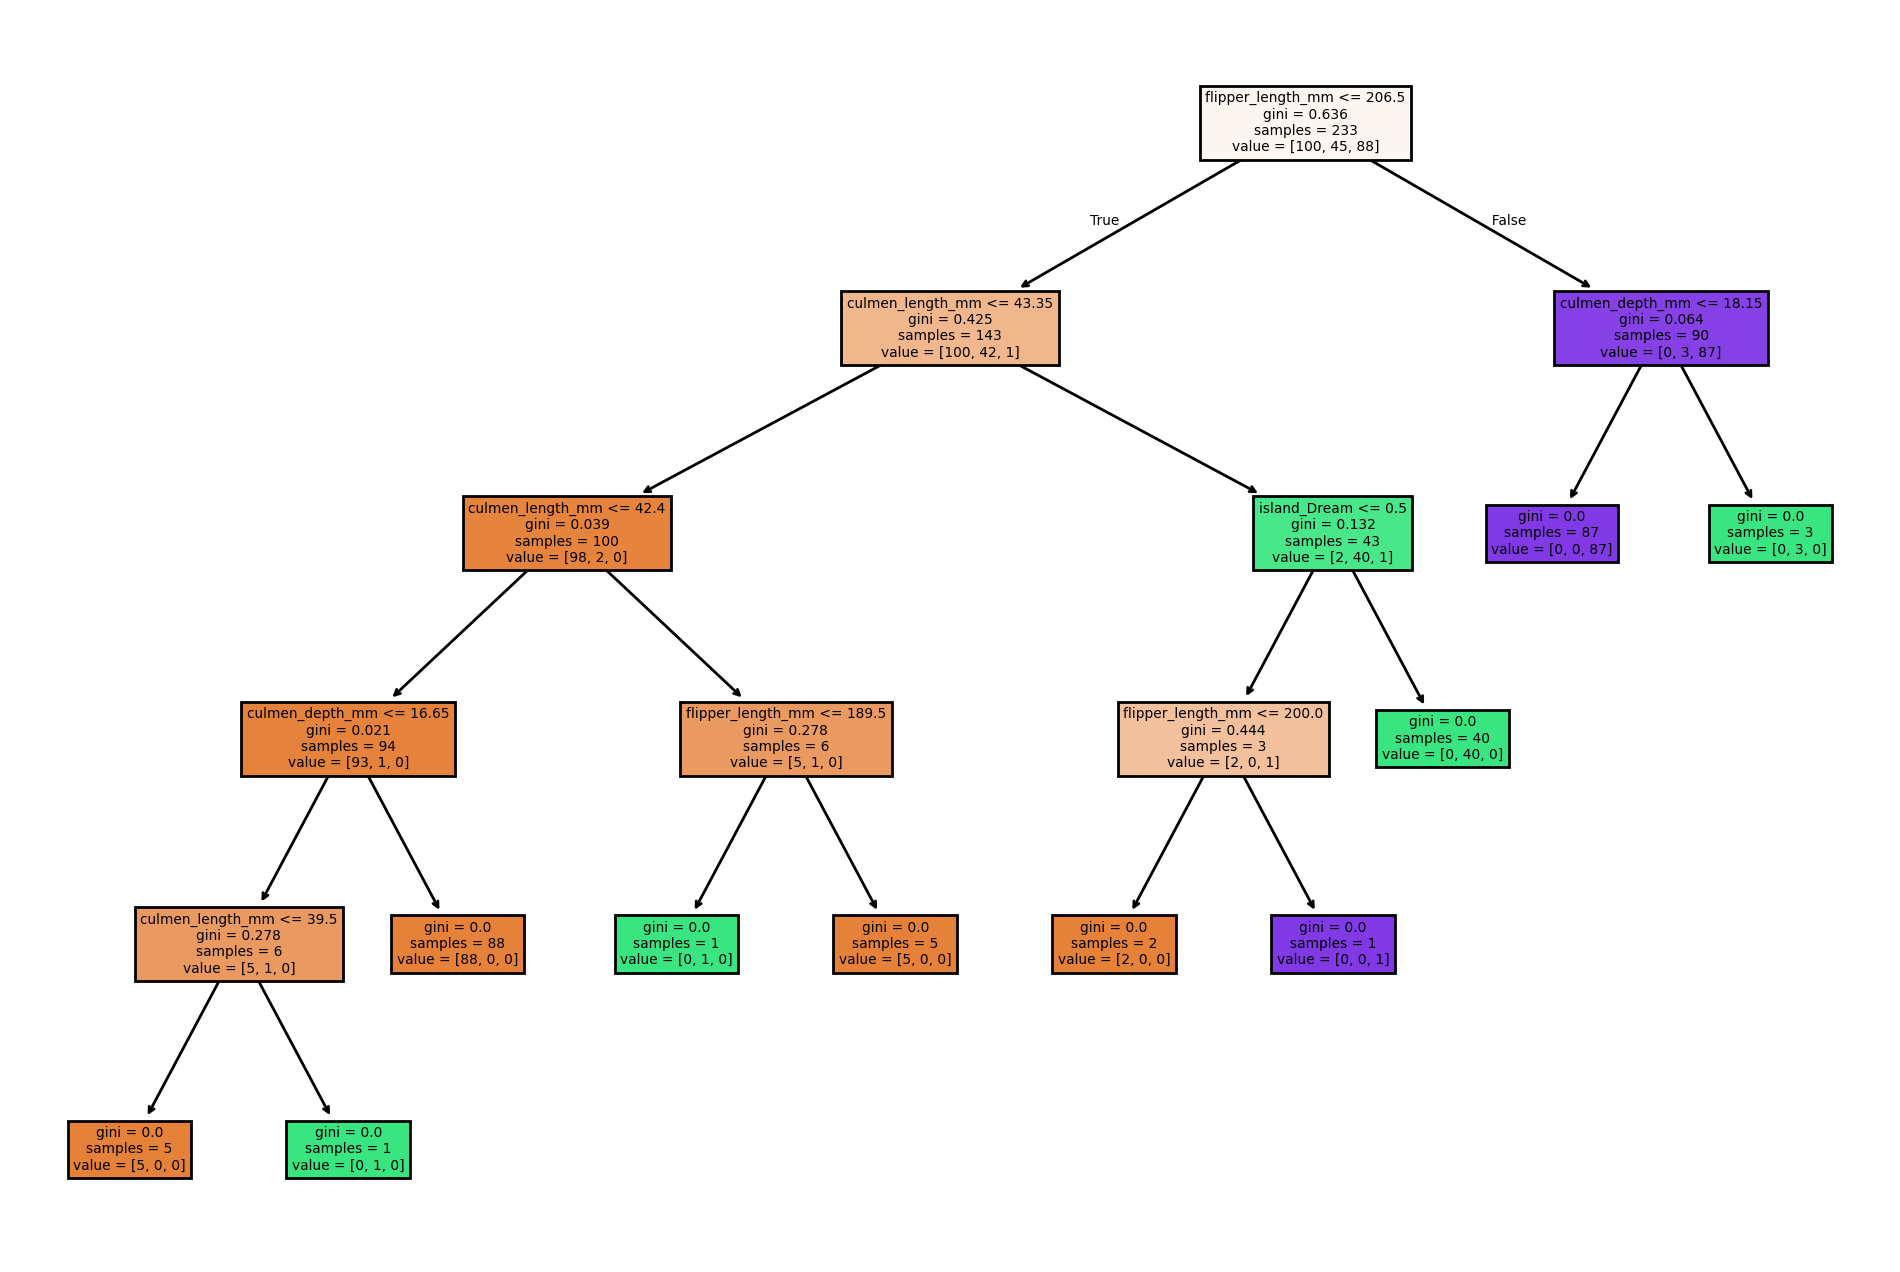

In [178]:
plt.figure(figsize=(12,8) , dpi=200)
plot_tree(model , filled=True,feature_names=x.columns);

# sonuna koyulan noktalı virgül yazıları kaldırır

Bütün bu yapılanları fonksiyona geçirelim


In [179]:
def model_sonuc(model):
    pengu_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model , X_test , y_test)
    print(classification_report(y_test , pengu_pred))
    plt.figure(figsize=(12,8) , dpi=200)
    plot_tree(model , filled=True,feature_names=x.columns);

In [180]:
az_agac = DecisionTreeClassifier(max_depth=2)
# 2 basamak ilerle
az_agac.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.93      0.91      0.92        46
   Chinstrap       0.87      0.87      0.87        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



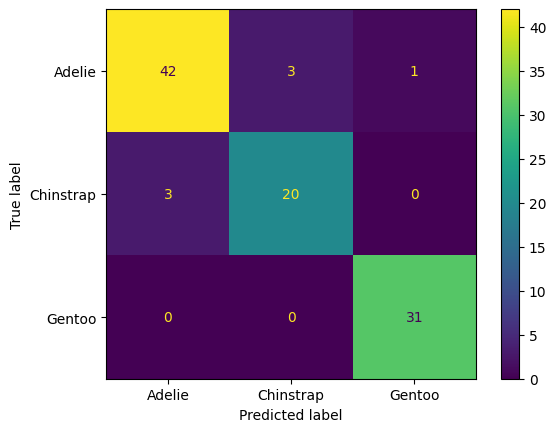

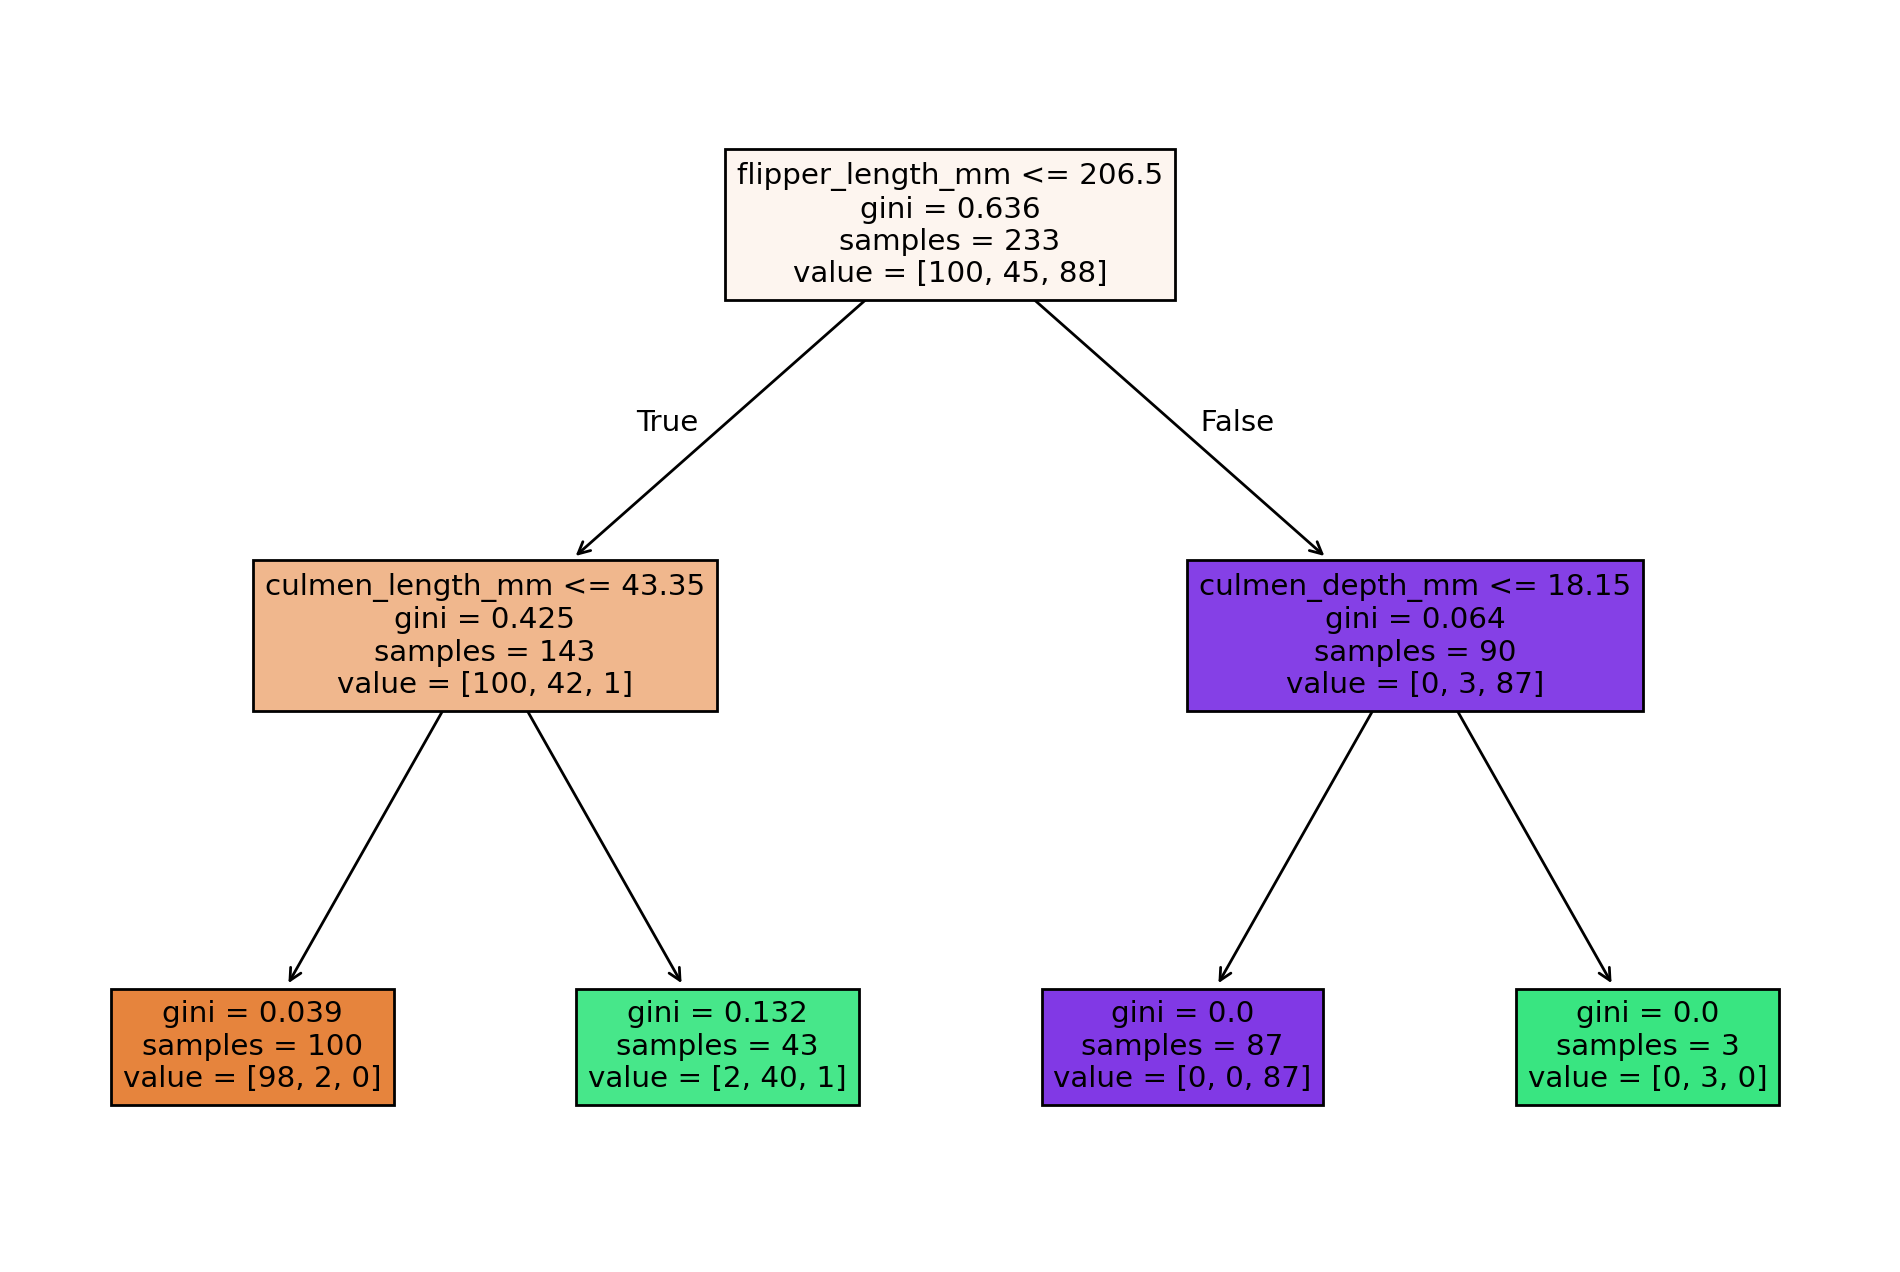

In [181]:
model_sonuc(az_agac)

# Az Yaprak

In [182]:
az_yaprak = DecisionTreeClassifier(max_leaf_nodes=5)
az_yaprak.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        46
   Chinstrap       0.91      0.87      0.89        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.94       100
   macro avg       0.94      0.93      0.94       100
weighted avg       0.94      0.94      0.94       100



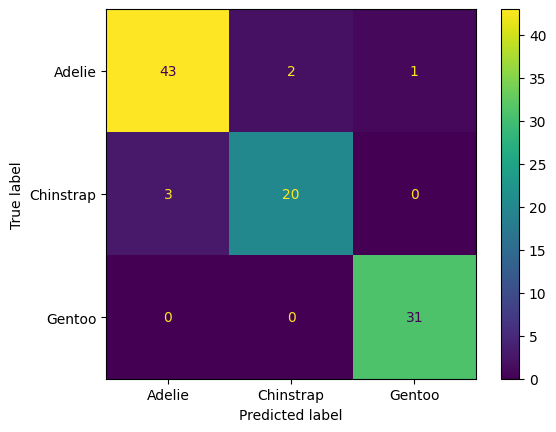

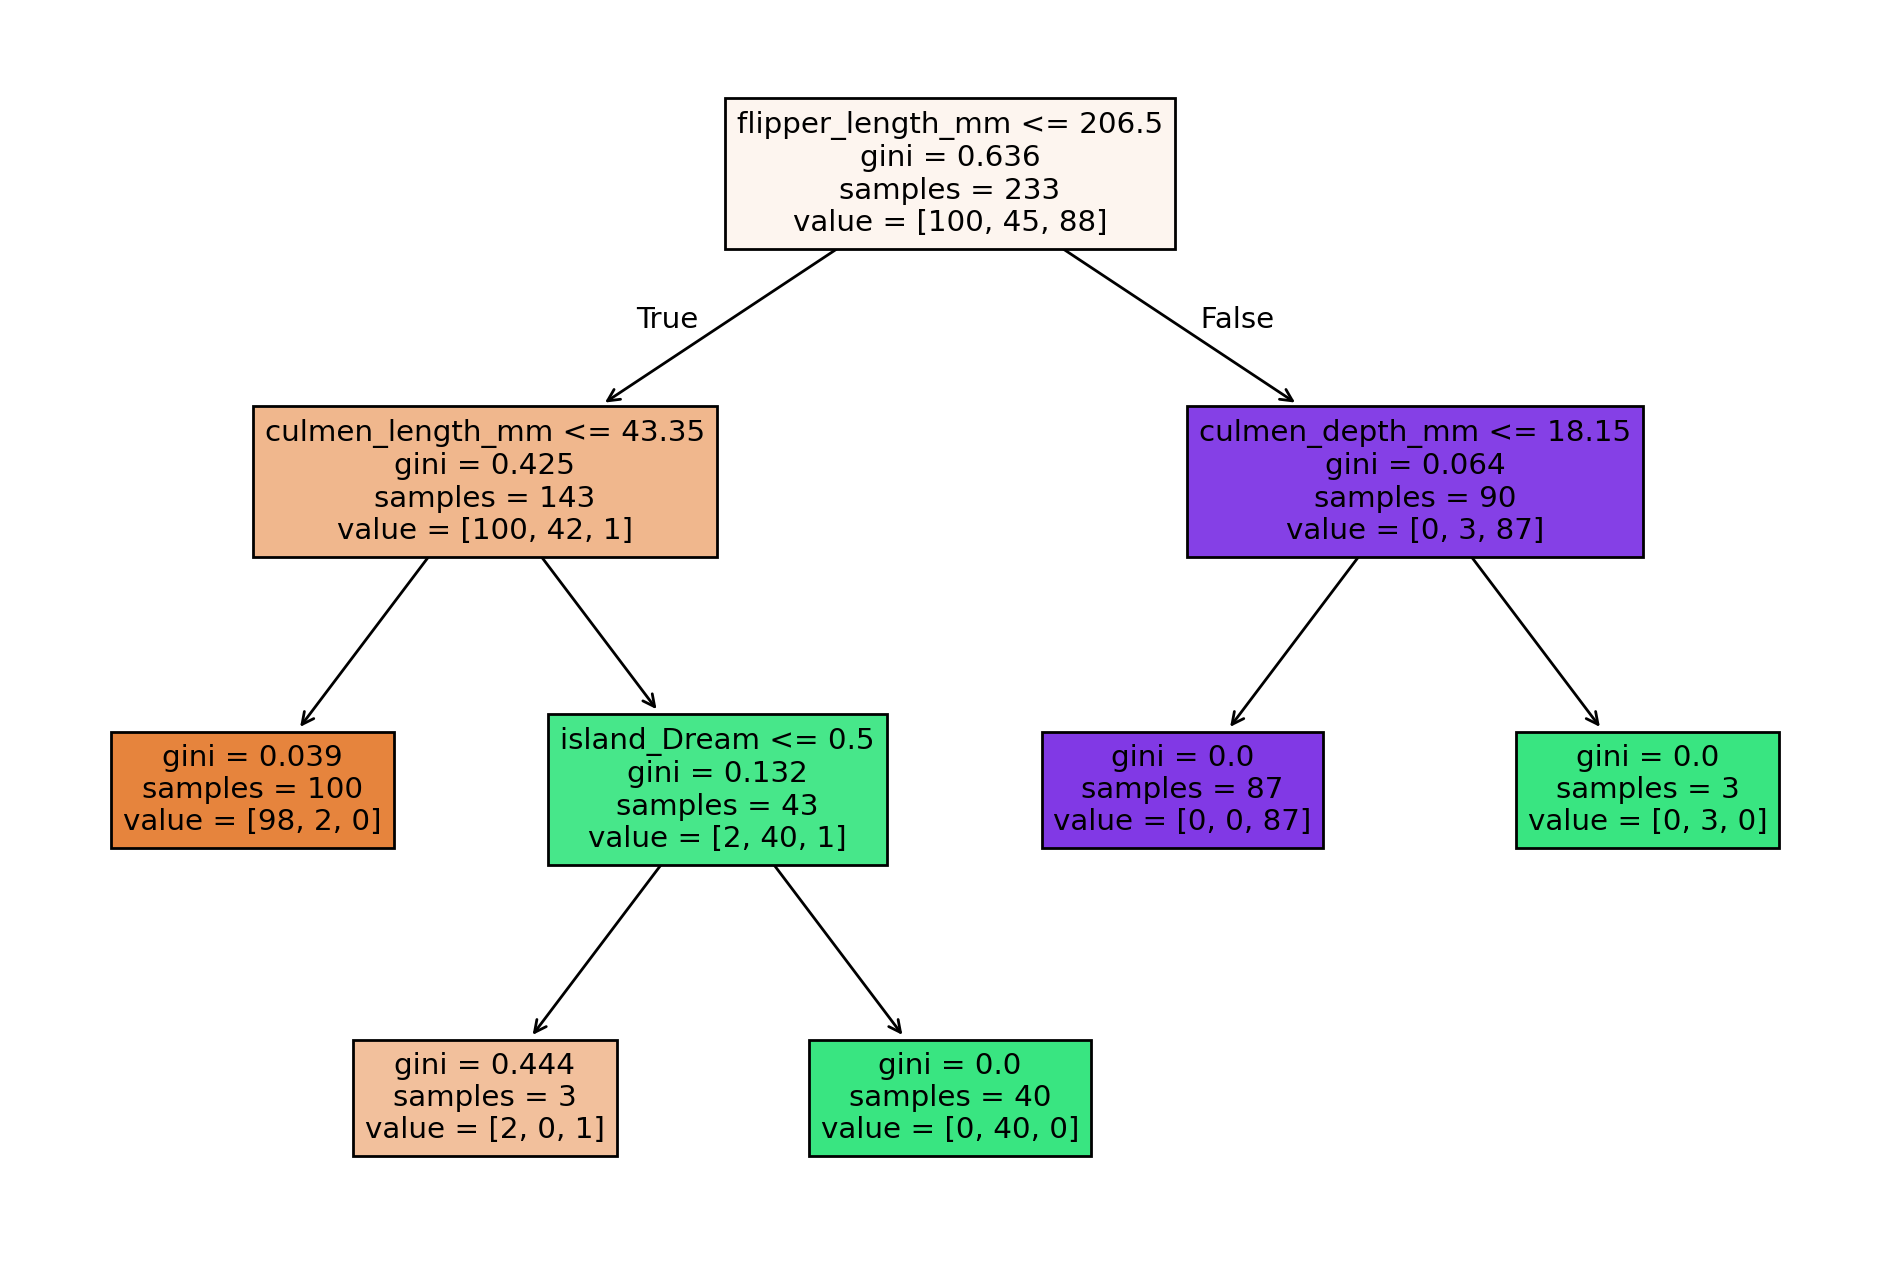

In [183]:
model_sonuc(az_yaprak)

Yaprak sayarken sonda oluşanları say.

## Optimizasyon

In [184]:
entropi= DecisionTreeClassifier(criterion="entropy")
entropi.fit(X_train,y_train)



DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.98      0.93      0.96        46
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.96       100
   macro avg       0.95      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



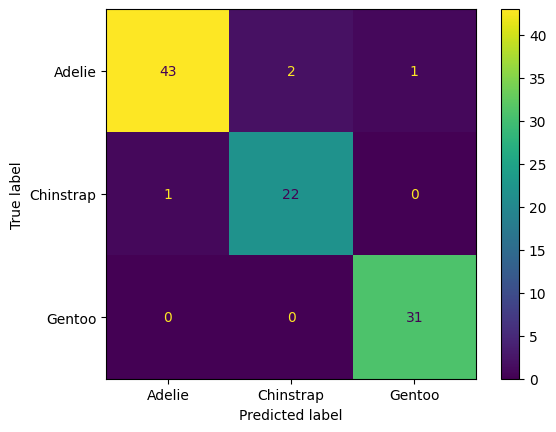

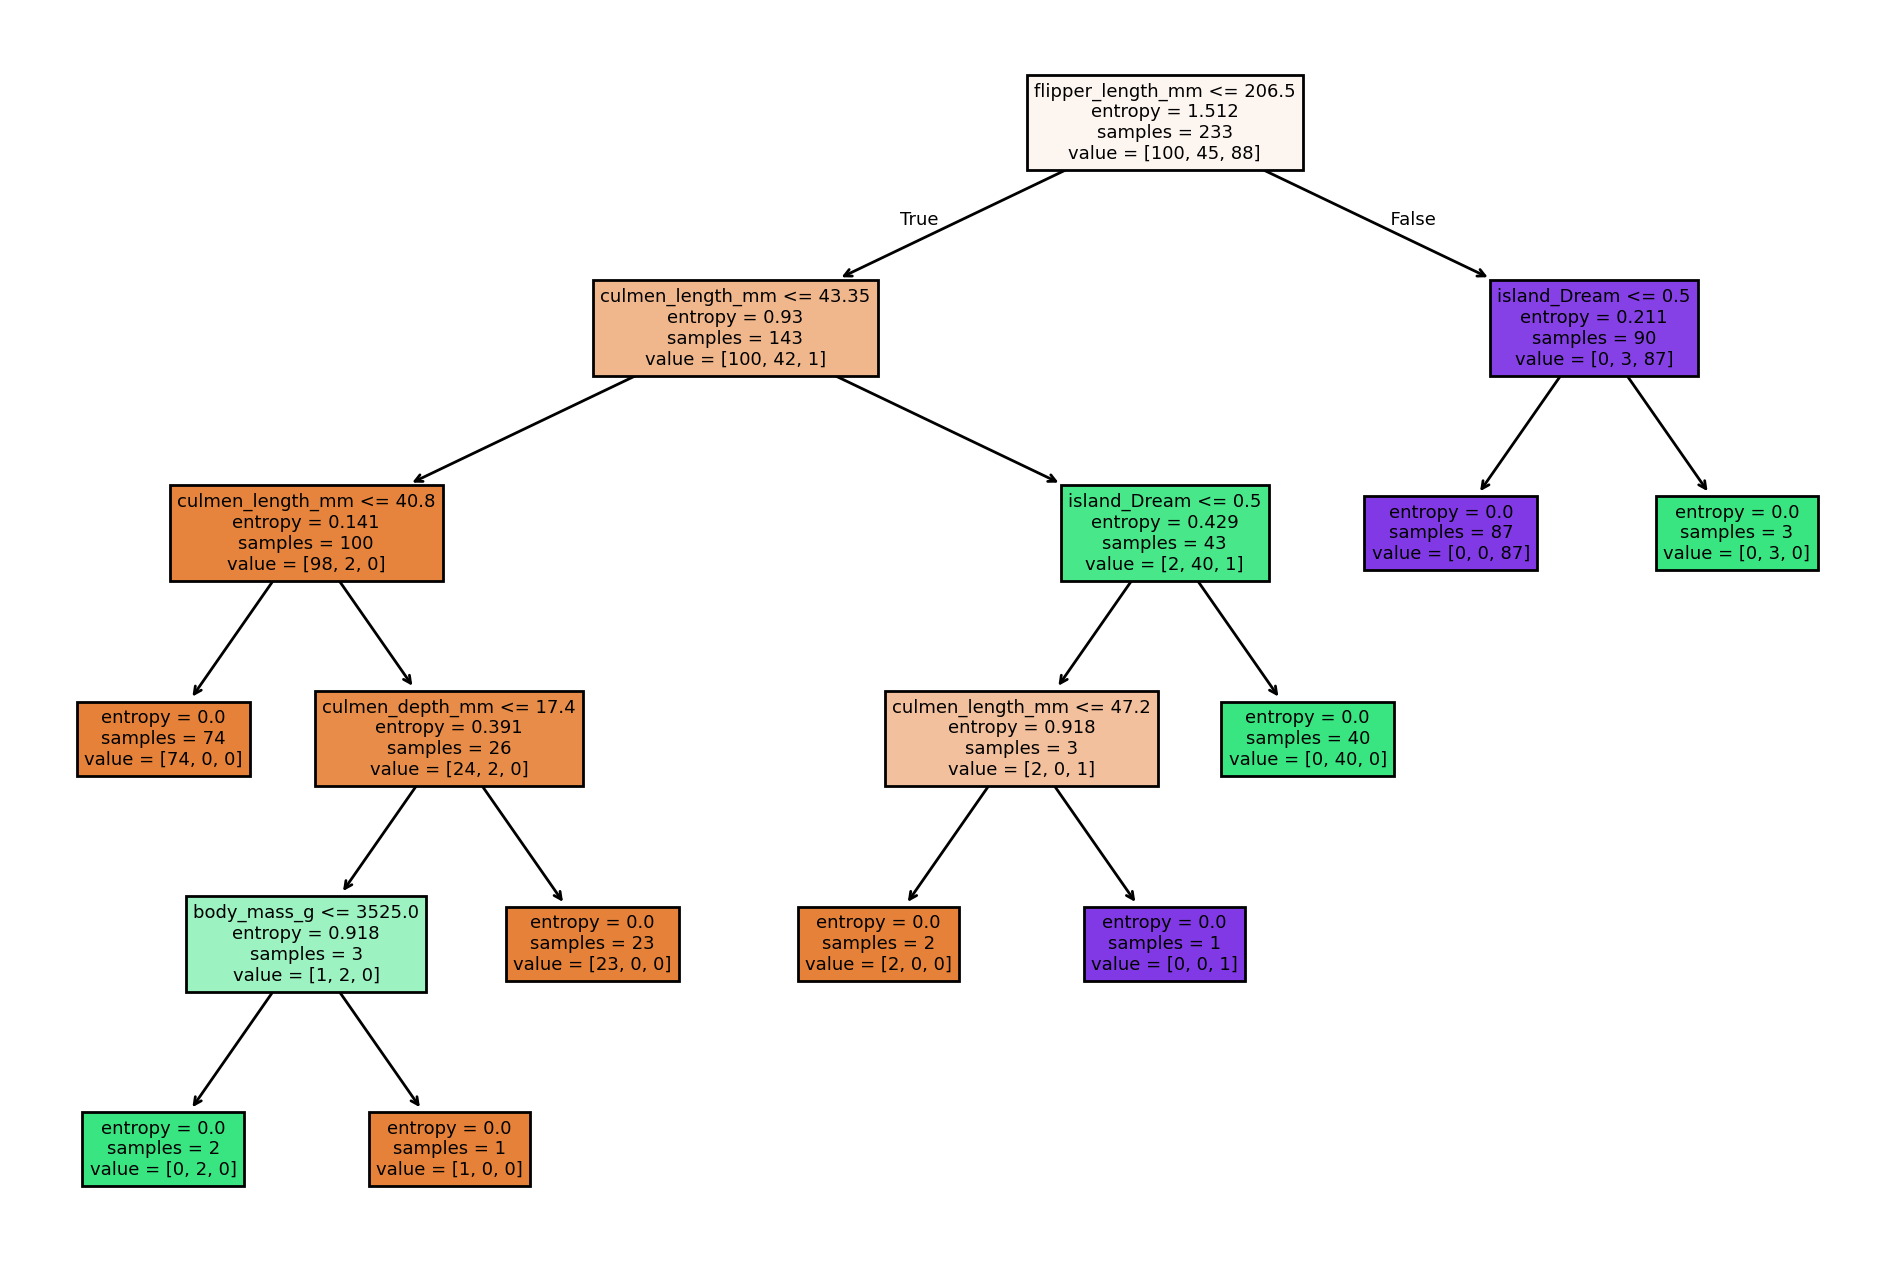

In [185]:
model_sonuc(entropi)